#**Julian Adames-Ng - Homework 1**

### **Programming Challenge 1: Even - Odd Vending Machine**

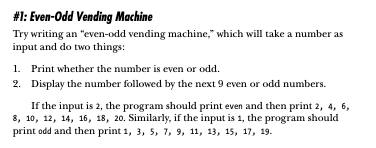

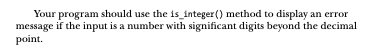

In [ ]:
def evenOdd():
  #ask for use input
  x1 = input("Enter a number: ")
  x = float(x1)
  #conditional checking if input is an integer
  if x.is_integer() == True:
    x = int(x)
    #use mod to check remainder
    if x % 2 == 0:
      print("The number you entered is EVEN.")
    else:
      print("The number you entered is ODD.")
    #display following digits
    for i in range(0,10):
      print(x + 2*i)
  #if not an integer, program produces an error
  else:
    print('ERROR: The number you entered is not an integer.  Only integers can be EVEN or ODD.')

evenOdd()
    

Enter a number: 27
The number you entered is ODD.
27
29
31
33
35
37
39
41
43
45


### **Programming Challenge 2: Statistics Calculator**

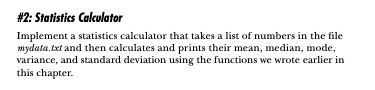

In [ ]:
def read_data(filename):
  #create array to load
  numbers = []
  with open(filename) as f:
    for line in f:
      numbers.append(float(line))
    return numbers

#mean calculator
def calculate_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s/N
  return mean

#median calculator
def calc_med(numbers):
  numbers.sort()
  #if list of data has even number of values...
  if len(numbers) % 2 == 0:  
    median = (numbers[ int( len(numbers)/2 ) - 1]  +  numbers[ int( len(numbers)/2 ) ])/2
  #if list of data had odd number of values...
  else:
    median = numbers[ int( len(numbers)//2) ]
  print("Median: ", median)

from collections import Counter

#finding mode of data set
def mode(numbers):
  c = Counter(numbers)
  mode = c.most_common(1)
  print("Mode: ", mode[0][0])

#finding sample variance and standard deviation
def var(numbers):
  sq = []
  for i in numbers:
    sq.append((i - mean)**2)
  sumSq = sum(sq)
  var = sumSq/(len(numbers) - 1)
  print("Variance: ", var)
  print("Standard Deviation: ", var**(1/2))

if __name__ == '__main__':
  data = read_data('mydata.txt')
  mean = calculate_mean(data)
  print('Mean: {0}'.format(mean))
  calc_med(data)
  mode(data)
  var(data)

Mean: 477.75
Median:  500.0
Mode:  100.0
Variance:  153869.8409090909
Standard Deviation:  392.26246431323364


### **Programming Challenge 3: Law of Large Numbers**

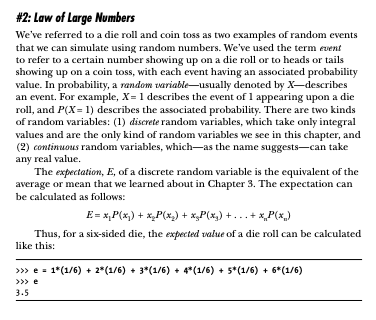

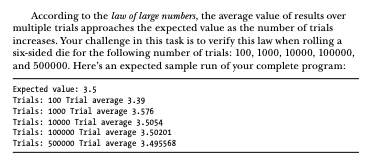

In [ ]:
import random

#take n number of trials
def expV(n):
  #create empty array to load
  eVS = []
  #elements that will load into eVS
  for trials in range(1, n + 1):
    #array containing computed mean of all x*P(x) for a given trial
    xP = []
    #each individual products x*P(x)
    for i in range(1, 7):
      #using a random variable x
      x = random.randint(1, 6)
      #        x   * P(x)
      xn = float(x)*(1/6)
      xP.append(xn)
    #sum of all products x*P(x)
    eV = sum(xP)
    #array containing all sums of products/expected values eV
    eVS.append(eV)
    #sum of the elements of array eVS
    s = sum(eVS)
    #mean of Sample Means
    mean = s/n
  print("Number of trials: ", n, "\nMean of Sample Means: ", mean,"\n")
    

expV(100)
expV(1000)
expV(10000)

Number of trials:  100 
Mean of Sample Means:  3.4916666666666667 

Number of trials:  1000 
Mean of Sample Means:  3.460333333333328 

Number of trials:  10000 
Mean of Sample Means:  3.499150000000002 



### **Programming Challenge 4: Implement the Gradient Descent**

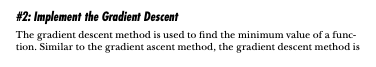

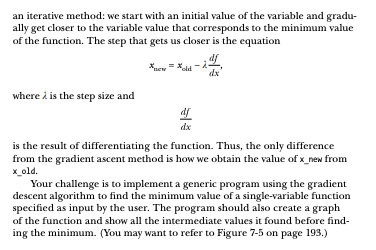

Enter a function in one variable: x^2-17
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 21


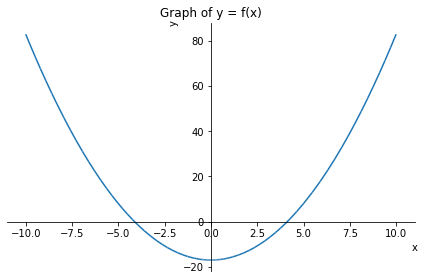

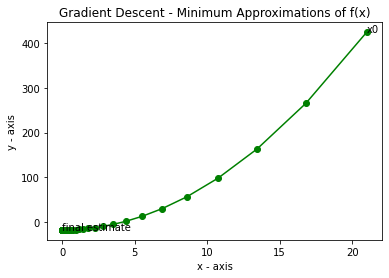

x: 0.00000345555957037453
Minimum value: -16.9999999999881


In [88]:
import math
from sympy import Derivative, Symbol, sympify, solve
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt


def grad_descent(x0, f1x, x):
  #specify error threshold
  epsilon = 1e-6
  step_size = 1e-1
  #assign the initial user inputted x-value to variable, x_old
  x_old = x0
  #implement recursive formula
  x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
  #create lists to populate with attempted x- and y- values
  #the starting value for the x- array is the initial user input
  xList = [x0]
  #symbolic expression for f
  y = Symbol('y')
  f1 = y - f 
  solutions = solve(f1, y)
  expr_y = solutions[0]
  y0 = expr_y.subs({x:x_old}).evalf()
  #the starting value for the y-array is the output of f(x0)=y0
  yList = [y0]
  #iterate using recursive formula
  while abs(x_old - x_new) > epsilon:
    x_old = x_new
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
    #add each 'new' x-value to xList
    xList.append(x_old)
    #symbolic expression of f
    y = Symbol('y')
    f1 = y - f 
    solutions = solve(f1, y)
    expr_y = solutions[0]
    y_val = expr_y.subs({x:x_old}).evalf()
    #add each 'new' y-value to yList
    yList.append(y_val)
  #plot entire function given by f
  plot(expr_y, title="Graph of y = f(x)", xlabel='x', ylabel='y')
  #plot intermediate values using scatterplot
  #plt.scatter(xList, yList)
  #plot data
  plt.plot(xList, yList, linestyle="solid", marker="o", color="green")
  plt.xlabel('x - axis')
  plt.ylabel('y - axis')
  plt.title('Gradient Descent - Minimum Approximations of f(x)')
  plt.annotate("x0", (x0, y0))
  plt.annotate("final estimate", (x_new, y_val))
  plt.show()
  return x_new


if __name__ == '__main__':
  f = input('Enter a function in one variable: ')
  var = input('Enter the variable to differentiate with respect to: ')
  var0 = float(input('Enter the initial value of the variable: '))
  try:
    f = sympify(f)
  except SympifyError:
    print('Invalid function entered')
  else:
    var = Symbol(var)
    d = Derivative(f, var).doit()
    var_min = grad_descent(var0, d, var)
    print('{0}: {1}'.format(var.name, var_min))
    print('Minimum value: {0}'.format(f.subs({var:var_min})))
    
    
    
    